In [21]:
import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta
from keras.losses import categorical_crossentropy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,  precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

from art.classifiers import KerasClassifier
from art.attacks import FastGradientMethod, ProjectedGradientDescent

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train_val), (x_test, y_test_val) = mnist.load_data()
input_shape = (img_rows, img_cols, 1)

In [3]:
x_train_cnn = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [4]:
x_train_ann = x_train.reshape(x_train.shape[0], img_rows* img_cols)
x_test_ann = x_test.reshape(x_test.shape[0], img_rows* img_cols)

In [5]:
y_train_cnn = to_categorical(y_train_val)
y_test_cnn = to_categorical(y_test_val)
y_train_ann = to_categorical(y_train_val)
y_test_ann = to_categorical(y_test_val)

In [6]:
activation = 'relu'
adadelta = Adadelta()
loss = categorical_crossentropy

In [ ]:
def cnn_model_1(activation):
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation=activation, input_shape=input_shape)) 
    
    model.add(Conv2D(16, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())

    model.add(Dense(128, activation=activation))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss=loss, optimizer=adadelta, metrics=['accuracy'])

    return model

In [ ]:
model_cnn_1 = cnn_model_1(activation)
model_cnn_1.summary()

In [ ]:
history_cnn_1 = model_cnn_1.fit(x_train_cnn, y_train_cnn, validation_data=(x_test_cnn,y_test_cnn), 
                                   epochs=epochs, batch_size=batch_size, verbose=1)

In [ ]:
pred_val_cnn1 = model_cnn_1.predict_classes(x_test_cnn)
print(classification_report(y_test_val, pred_val_cnn1))
acc_cnn = accuracy_score(y_test_val, pred_val_cnn1)
prec_cnn = precision_score(y_test_val, pred_val_cnn1, average = 'weighted')
rec_cnn = recall_score(y_test_val, pred_val_cnn1, average = 'weighted')
f1_cnn = f1_score(y_test_val, pred_val_cnn1, average = 'weighted')

In [7]:
def dense_model_1():
    
    model = Sequential()  
    
    model.add(Dense(100, activation='relu', input_dim=784))
    model.add(Dense(200, activation='relu')) 
    model.add(Dense(200, activation='relu')) 
    model.add(Dense(200, activation='relu')) 
    model.add(Dense(100, activation='relu')) 
    model.add(Dense(10, activation='softmax'))
         
    model.compile(loss=loss, optimizer=adadelta, metrics=['accuracy'])
 
    return model

In [8]:
model_dense_1 = dense_model_1()
model_dense_1.summary()






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 200,210
Trainable params: 200,210
Non-trainable params: 0
_________________________________________________________________

In [9]:
history_dense_1 = model_dense_1.fit(x_train_ann, y_train_ann, validation_data=(x_test_ann,y_test_ann), 
                                   epochs=epochs, batch_size=batch_size, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 178us/step - loss: 2.4694 - acc: 0.7761 - val_loss: 0.3590 - val_acc: 0.9038
Epoch 2/12
60000/60000 [==============================] - 8s 129us/step - loss: 0.2129 - acc: 0.9404 - val_loss: 0.1857 - val_acc: 0.9508
Epoch 3/12
60000/60000 [==============================] - 6s 108us/step - loss: 0.1418 - acc: 0.9589 - val_loss: 0.1721 - val_acc: 0.9519
Epoch 4/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.1131 - acc: 0.9676 - val_loss: 0.1521 - val_acc: 0.9568
Epoch 5/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0895 - acc: 0.9742 - val_loss: 0.1333 - val_acc: 0.9684
Epoch 6/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0758 - acc: 0.9783 - val_loss: 0.1358 - val_acc: 0.9689
Epoch 7/12
60000/60000 [==

In [10]:
pred_val_dense_1 = model_dense_1.predict_classes(x_test_ann)
print(classification_report(y_test_val, pred_val_dense_1))
acc_ann = accuracy_score(y_test_val, pred_val_dense_1)
prec_ann = accuracy_score(y_test_val, pred_val_dense_1)
rec_ann = recall_score(y_test_val, pred_val_dense_1, average = 'weighted')
f1_ann = f1_score(y_test_val, pred_val_dense_1, average = 'weighted')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.98      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.99      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Benign Performance

In [ ]:
labels = ['accuracy', 'precision', 'recall', 'f1-score']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, [acc_ann, prec_ann, rec_ann, f1_ann], width, label='ANN')
ax.bar(x + width/2, [acc_cnn, prec_cnn, rec_cnn, f1_cnn], width, label='CNN')

ax.set_title('Scores by method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

### Adversarial Samples

In [23]:
classifier_ann = KerasClassifier(model=model_dense_1, use_logits=False)
attack_ann_1 = ProjectedGradientDescent(classifier_ann, eps=0.3, eps_step=0.01, max_iter=40, targeted=False, 
                                  num_random_init=True)
adv_fg_ann = attack_ann_1.generate(x=x_test_ann[0:1], y=y_test_val[0:1])

In [26]:
x_test_ann[0] - adv_fg_ann

array([[ 0.22525461, -0.02212151,  0.28771108, -0.11035471,  0.26407635,
        -0.28647617, -0.10324833, -0.12606467,  0.19889037, -0.21452819,
        -0.2684212 ,  0.28820813, -0.00412485,  0.26711786, -0.06291749,
        -0.21975133, -0.18388362,  0.28052625, -0.1906204 , -0.16976005,
         0.00985838, -0.23260275,  0.00725091,  0.09932746,  0.01029759,
         0.15453286,  0.16805409, -0.01343874,  0.26909167,  0.22540615,
         0.10137677, -0.15257187, -0.13587081,  0.22813544,  0.16192068,
        -0.01411887,  0.09819537, -0.12048398,  0.268644  , -0.24098355,
        -0.05551402, -0.10550387,  0.26596698,  0.10927453,  0.23154986,
        -0.2558589 , -0.29671988,  0.25350595, -0.05438451,  0.27488053,
         0.24116418,  0.04729297, -0.16360563,  0.15920125,  0.1474858 ,
         0.2805056 , -0.05409695,  0.06749721,  0.2760368 , -0.2640701 ,
        -0.08975748, -0.23067617,  0.08322582,  0.23411784, -0.01579057,
         0.05679958,  0.10842209,  0.05450231,  0.2

Original Sample :


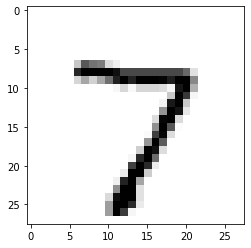

Adversarial Sample:


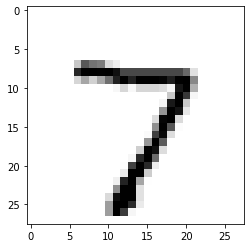

In [27]:
print("Original Sample :")
plt.imshow(x_test_ann[0].reshape((28,28)), cmap='Greys')
plt.show()
print("Adversarial Sample:")
plt.imshow(adv_fg_ann[0].reshape((28,28)), cmap='Greys')
plt.show()

In [30]:
x_adv_fg_ann = attack_ann_1.generate(x=x_test_ann[0:1000], y=y_test_val[0:1000])
pred_val_dense_2 = model_dense_1.predict_classes(x_adv_fg_ann)
print(classification_report(y_test_val[0:1000], pred_val_dense_2))
#acc_ann = accuracy_score(y_test_val, pred_val_dense_2)
#prec_ann = accuracy_score(y_test_val, pred_val_dense_2)
#rec_ann = recall_score(y_test_val, pred_val_dense_2, average = 'weighted')
#f1_ann = f1_score(y_test_val, pred_val_dense_2, average = 'weighted')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        85
           1       0.98      0.98      0.98       126
           2       0.97      0.98      0.97       116
           3       0.95      0.99      0.97       107
           4       0.98      0.96      0.97       110
           5       1.00      0.97      0.98        87
           6       0.98      1.00      0.99        87
           7       0.97      0.95      0.96        99
           8       0.97      0.94      0.95        89
           9       0.96      0.95      0.95        94

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

